## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## introduction

The Co2 emissions around the world has been rising as time passes, leading to servre problems such as global warming and climate changes in different areas of the world. The purpose of this project will be to analysis the countries with top co2 emittions and see the overall rise over 50 years.

The source was will be used in this project comes from the greenhouse gas emission data set found in owid-co2-data.csv from "Our World in Data". This source provides data of how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (from 1971 to 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

##### Solution

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [3]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [4]:
df = df.loc[df['country'].isin(non_countries)== False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [5]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### Solution

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

In [ ]:
# The population shouldn't be float64 since counting people can't be in decimal.
# There wasn't any null values in the in the column.

##### $\rightarrow$ What years are present in the data set?

##### Solution

In [8]:
df['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

In [66]:
df_co2 = df[['co2','country','year']]

In [72]:
df_co2.sort_values(by = ['year','co2'], ascending = False).head(10)

,co2,country,year
8990,11472.368,China,2021
44222,5007.336,United States,2021
20137,2709.684,India,2021
35054,1755.547,Russia,2021
21757,1067.398,Japan,2021
20553,748.879,Iran,2021
16795,674.754,Germany,2021
36665,672.380,Saudi Arabia,2021
20309,619.278,Indonesia,2021
39260,616.075,South Korea,2021


##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

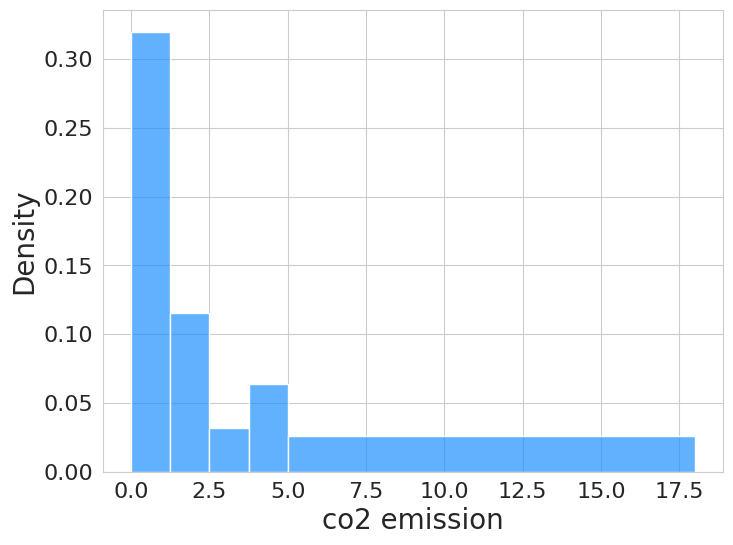

In [24]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2', 
             bins = np.r_[np.linspace(0, 5, 5), 18], color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('co2 emission',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

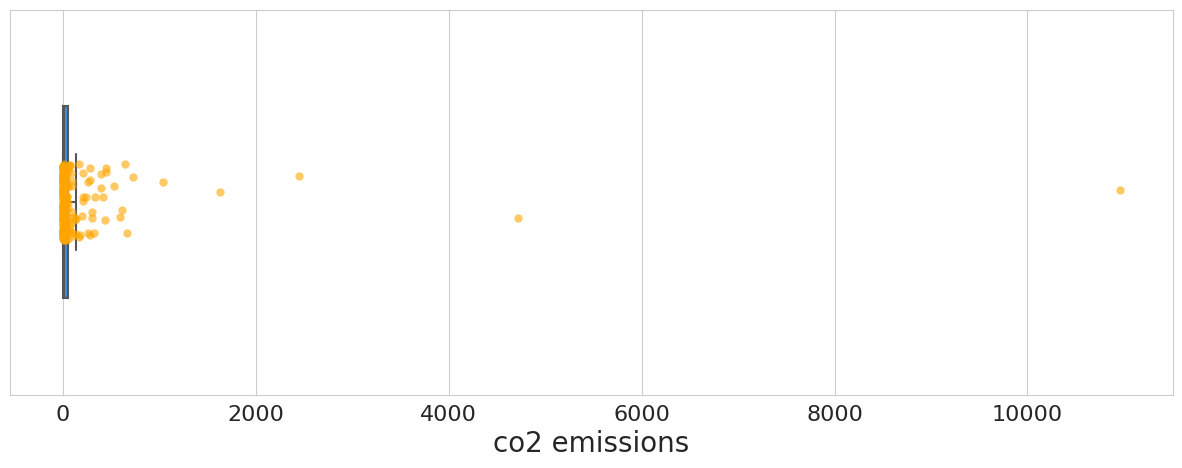

In [26]:
# Figure size
plt.figure(figsize = (15,5))

# Use Seaborn to make the boxplot, but don't show outliers (fliersize = 0)
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

# Use Seaborn to make the strip plot
sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

# Label axes
plt.xlabel('co2 emissions', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

In [ ]:
# Yes, the number 1 co2 emission of 11472.368 from China is in the 2020 outlier of the distribution.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

##### Solution

In [ ]:
# No, the data set hasn't be missing any co2 emission values for the top 10 emitters in 2020 over the years 1971 to 2020.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

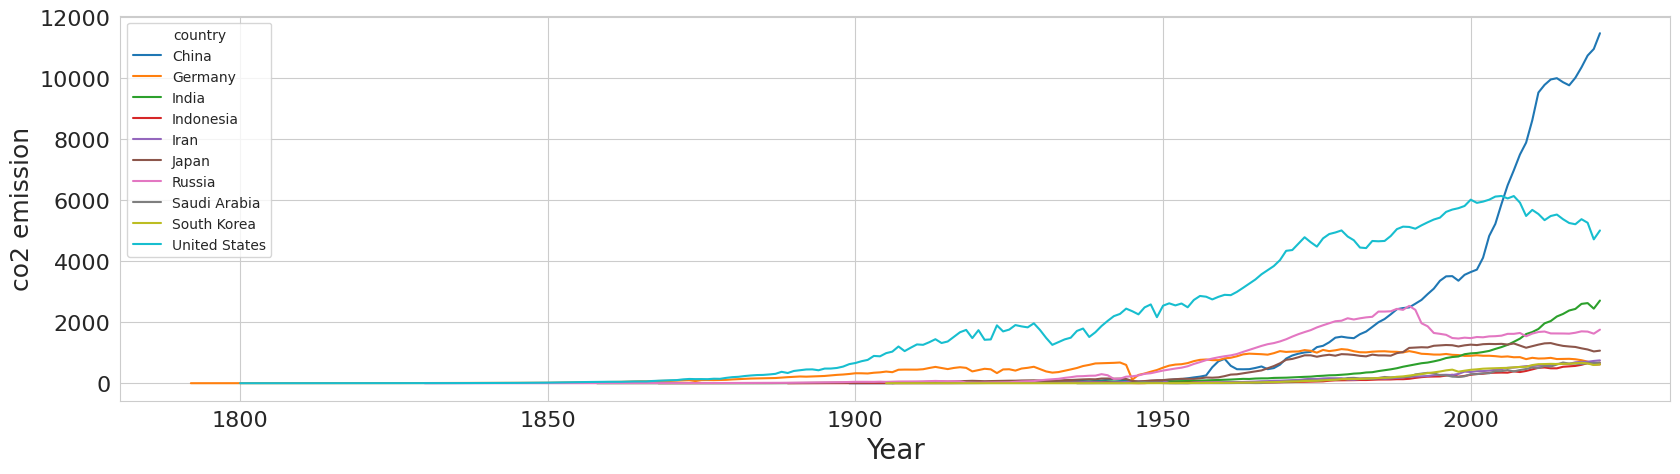

In [44]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China','United States','India','Russia','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], x='year', y='co2',hue = 'country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2 emission', fontsize = 18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

<ipython-input-57-7a86593d9817>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('year',).mean(),


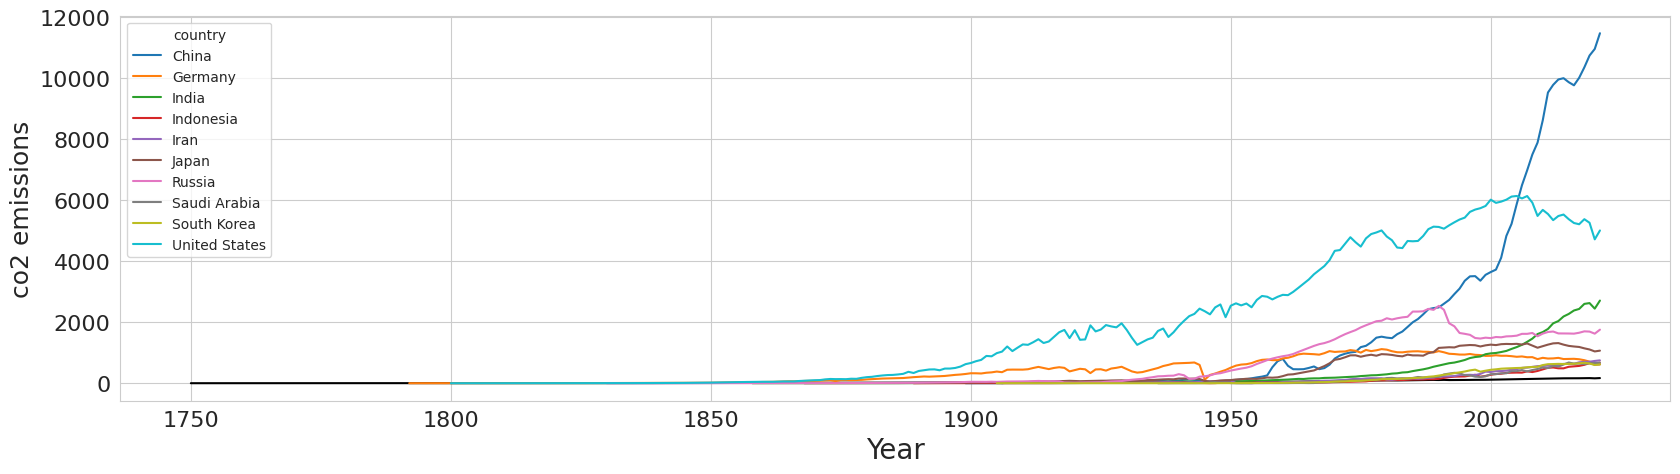

In [57]:
plt.figure(figsize=(20,5))

sns.lineplot(data = df.groupby('year',).mean(),
             x = 'year',
             y = 'co2',
             color = 'k' )

sns.lineplot(data=df[df['country'].isin(['China','United States','India','Russia','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], x='year', y='co2',hue = 'country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2 emissions', fontsize = 18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

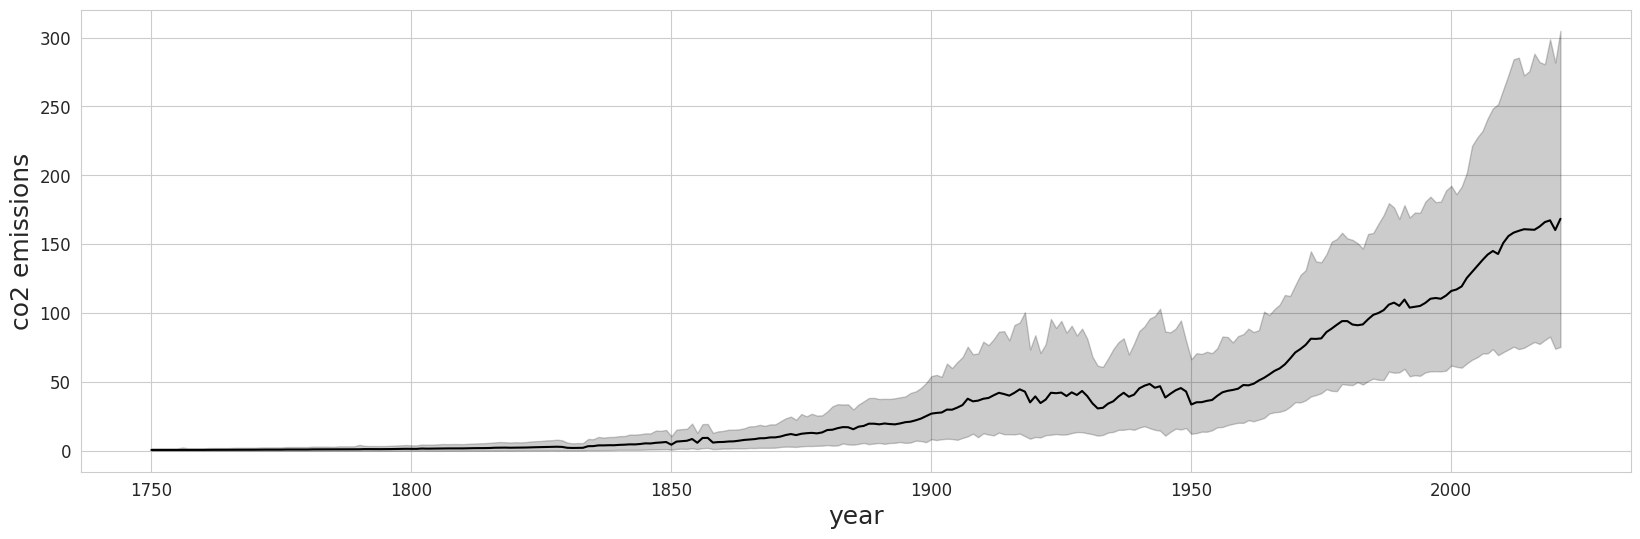

In [58]:
plt.figure(figsize = (20,6))

sns.lineplot(data = df,
             x = 'year',
             y = 'co2',
             color = 'k' ,
             estimator = np.mean )

plt.tick_params(labelsize = 12)
plt.xlabel('year', fontsize = 18)
plt.ylabel ('co2 emissions',fontsize = 18);

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

In [ ]:
# The trend in CO2 emissions from these countries has increased over the last 50 years exponetially based on the distribution.